# Teoría de la información con Python

La fórmula matemática que encontró [Shannon](https://es.wikipedia.org/wiki/Claude_Elwood_Shannon) para medir la <a href="https://es.wikipedia.org/wiki/Entrop%C3%ADa_(informaci%C3%B3n)" target="_blank">Entropía</a> de un mensaje es muy similar a la que se utiliza en [Termodinámica](https://es.wikipedia.org/wiki/Termodin%C3%A1mica) para medir el grado de desorden de un sistema. Es la siguiente:

$$ H(x) = - \sum_{i} p(i) log_2 p(i) $$

Cuando [Shannon](https://es.wikipedia.org/wiki/Claude_Elwood_Shannon) se dio cuenta de que la <a href="https://es.wikipedia.org/wiki/Entrop%C3%ADa_(informaci%C3%B3n)" target="_blank">Entropía</a> de una secuencia de símbolos estaba relacionada con la cantidad de *información* que la cadena de símbolos tiende a contener, de repente tuvo una herramienta para cuantificar la *información* y la redundancia en un mensaje. Fue capaz de demostrar, matemáticamente, cuánta *información* puede transmitirse en cualquier medio y que existe un límite fundamental para la cantidad de *información* que puede transmitir con un equipo determinado. 


Veamos algunos ejemplos de como calcular la <a href="https://es.wikipedia.org/wiki/Entrop%C3%ADa_(informaci%C3%B3n)" target="_blank">Entropía</a> con la ayuda de [Python](https://www.python.org/):

In [ ]:
# <!-- collapse=True -->
import matplotlib.pyplot as plt
import numpy as np
import warnings

# ingnorar mensajes de advertencias en el notebook
warnings.filterwarnings('ignore')

# graficos en el notebook
%matplotlib inline


def entropia(X):
    """Devuelve el valor de entropia de una muestra de datos""" 
    probs = [np.mean(X == valor) for valor in set(X)]
    return round(np.sum(-p * np.log2(p) for p in probs), 3)


def entropia_prob_pq(x):
    """Devuelve la entropia de una probabilidad de dos posibilidades"""
    return round((-x * np.log2(x)) + (-(1 - x ) * np.log2((1 - x))), 3)


def entropia_posibilidades(x):
    """Devuelve la entropía para la cantidad de posibilidades independientes x"""
    return round(np.log2(x), 3)

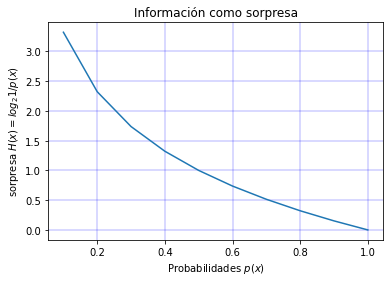

In [ ]:
# Graficando la información como sorpresa
# Mientras menos probable, más sorpresa y más información contiene.
vent = np.vectorize(entropia_posibilidades)

X = np.linspace(0, 1, 11)

plt.plot(X, vent(X)*-1)
plt.title("Información como sorpresa")
plt.grid(color='b', linestyle='-', linewidth=.3)
plt.xlabel(r'Probabilidades $p(x)$')
plt.ylabel(r'sorpresa $H(x) = log_2 1/p(x)$')
plt.show()

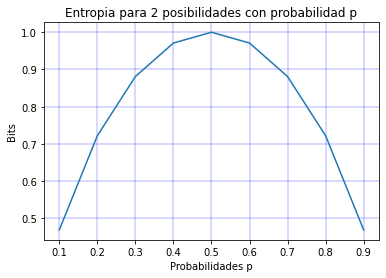

In [ ]:
# Graficando la entropia en el caso de 2 posibilidades con
# probabilidad p y (1- p)

# vectorizar la función para poder pasarle un vector de parámetro
vent = np.vectorize(entropia_prob_pq)

X = np.linspace(0, 1, 11)

plt.plot(X, vent(X))
plt.title("Entropia para 2 posibilidades con probabilidad p")
plt.grid(color='b', linestyle='-', linewidth=.3)
plt.xlabel('Probabilidades p')
plt.ylabel('Bits')
plt.show()

In [ ]:
# La entropia de una muestra de 2 posibilidades completamente
# aleatorias, en la que cualquiera de los 2 valores tiene la 
# misma probabilidad (p=0.5) de ser seleccionada es de 1 bit

# Muestra de 10000 valores aleatorios entre 0 y 1
X = np.random.randint(0, 2, size=10000)

entropia(X), entropia_posibilidades(2)

(1.0, 1.0)

In [ ]:
# La entropia de una muestra de 8 posibilidades completamente
# aleatorias es igual a 3 bits.

# Muestra de 10000 valores aleatorios entre 0 y 7
X = np.random.randint(0, 8, size=10000)

entropia(X), entropia_posibilidades(8)

(2.999, 3.0)

Otro de los conceptos fundamentales de la [Teoría de la información](https://es.wikipedia.org/wiki/Teor%C3%ADa_de_la_informaci%C3%B3n) es el de [Redundancia](https://es.wikipedia.org/wiki/Redundancia). La [Redundancia](https://es.wikipedia.org/wiki/Redundancia) son esas pistas adicionales en una sentencia o mensaje que nos permiten entender su significado incluso si el mensaje esta incompleto o distorsionado; son esos caracteres extra en una cadena de símbolos, la parte predecible que nos permite completar la *información* faltante. Cualquier sentencia de cualquier lenguaje es altamente redundante. Todo sentencia nos proporciona *información* adicional para que podemos descifrarla. Esta [Redundancia](https://es.wikipedia.org/wiki/Redundancia) es fácil de ver, simplemente tr-t- d- l--r -st- m-ns-j-. A pesar de que quitemos todas la vocales, igualmente se podemos entender la sentencia.



In [ ]:
# <!-- collapse=True -->
import random

random.seed(1982)


def adivinar_numero():
    mi_numero = random.randint(1, 1000)
    bits = 1
    tu_numero = int(input("Adivine un número entero entre 1 y 1000\nIngrese un número entre 1 y 1000: "))
    
    while tu_numero != mi_numero:
        if tu_numero < mi_numero:
            tu_numero = int(input("Su número es muy bajo!\nIngrese otro número entre 1 y 1000:"))
        else:
            tu_numero = int(input("Su número es muy alto!\nIngrese otro número entre 1 y 1000:"))
        bits += 1
    
    print("Felicidades el número es {0} y ha utilizado {1} bits!".format(mi_numero, bits))

In [ ]:
adivinar_numero()

Adivine un número entero entre 1 y 1000
Ingrese un número entre 1 y 1000: 812
Su número es muy bajo!
Ingrese otro número entre 1 y 1000:900
Su número es muy alto!
Ingrese otro número entre 1 y 1000:840
Su número es muy alto!
Ingrese otro número entre 1 y 1000:830
Su número es muy alto!
Ingrese otro número entre 1 y 1000:825
Su número es muy alto!
Ingrese otro número entre 1 y 1000:816
Su número es muy alto!
Ingrese otro número entre 1 y 1000:813
Su número es muy bajo!
Ingrese otro número entre 1 y 1000:814
Felicidades el número es 814 y ha utilizado 8 bits!


In [ ]:
# <!-- collapse=True -->
def adivinar_nombre():
    nombres = [
    "ramses", "rodolfo", "regina", "ruth", "ramiro",
    "ramon", "roxana", "rebeca", "raquel", "ruben",
    "rosario", "renata", "raul", "romina", "roberto",
    "ricardo", "rafael", "rosa", "rodrigo", "rocio"
    ]
    index = random.randint(0, 19)
    mi_nombre = nombres[index]
    tu_nombre = input("Adivina el nombre! Empieza con R y tiene {} letras: ".format(len(mi_nombre)))
    letras = 2
    bits = 1
    
    while tu_nombre.lower() != mi_nombre:
        mi_nombre_parcial = mi_nombre[:letras]
        if mi_nombre_parcial == mi_nombre:
            break
        
        tu_nombre = input("Inténtalo otra vez! Empieza con {0} y tiene {1} letras:".format(mi_nombre_parcial,
                                                                                           len(mi_nombre)))
        bits += 1
        letras += 1
    
    print("El nombre es {0} y has utilizado {1} bits! Los restantes {2} son redundantes!".format(mi_nombre.upper(),
                                                                                                bits, 
                                                                                                 len(mi_nombre) - bits))
        

In [ ]:
adivinar_nombre()

Adivina el nombre! Empieza con R y tiene 7 letras: rosmery
Inténtalo otra vez! Empieza con ro y tiene 7 letras:rodrigo
Inténtalo otra vez! Empieza con rod y tiene 7 letras:rodriga
Inténtalo otra vez! Empieza con rodo y tiene 7 letras:rodolfo
El nombre es RODOLFO y has utilizado 4 bits! Los restantes 3 son redundantes!
